In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import glob

In [11]:
train = pd.read_csv('blogData_train.csv',header=None)

In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, 0 to 280
dtypes: float64(281)
memory usage: 112.3 MB


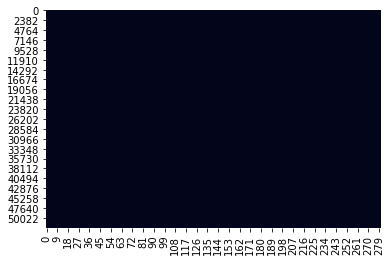

In [5]:
sns.heatmap(train.isnull(),cbar=False)

## Independent and Dependent Variables

In [13]:
X = train.iloc[:,:-1]

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y = train.iloc[:,-1]

In [16]:
y.head()

0     1.0
1     0.0
2     0.0
3     1.0
4    27.0
Name: 280, dtype: float64

## Splitting Dataset 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36677, 280) (15720, 280) (36677,) (15720,)


## Base Model 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred = reg.predict(x_test)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
print(mean_squared_error(y_test,y_pred))

1056.8092514276523


In [18]:
print(r2_score(y_test,y_pred))

0.33458207384260585


## Standarize the Data 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [89]:
xtrain_sc = sc.fit_transform(x_train)
xtest_sc = sc.fit_transform(x_test)

In [90]:
xtrain_sc

array([[ 0.10482113,  0.74899853,  0.11607488, ...,  0.        ,
        -0.04461053, -0.03598484],
       [-0.48290051, -0.7181957 , -0.05959165, ...,  0.        ,
        -0.04461053, -0.03598484],
       [-0.50064265, -0.74712805, -0.05959165, ...,  0.        ,
        -0.04461053, -0.03598484],
       ...,
       [ 0.02858811,  0.60180234, -0.05959165, ...,  0.        ,
        -0.04461053, -0.03598484],
       [-0.49724287, -0.73781743, -0.05959165, ...,  0.        ,
        -0.04461053, -0.03598484],
       [ 0.32917077,  0.88682025, -0.05959165, ...,  0.        ,
        -0.04461053, -0.03598484]])

In [91]:
xtest_sc

array([[-0.10984853, -0.15411968, -0.04515967, ...,  0.        ,
        -0.04687583, -0.04740508],
       [-0.01365635,  0.4668742 , -0.04515967, ...,  0.        ,
        -0.04687583, -0.04740508],
       [ 0.57022741,  0.73238373, -0.04515967, ...,  0.        ,
        -0.04687583, -0.04740508],
       ...,
       [-0.35947105, -0.46369117,  0.06639124, ...,  0.        ,
        -0.04687583, -0.04740508],
       [-0.48750641, -0.74224719, -0.04515967, ...,  0.        ,
        -0.04687583, -0.04740508],
       [-0.36554594, -0.22940599, -0.04515967, ...,  0.        ,
        -0.04687583, -0.04740508]])

## PCA

In [25]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA()

In [112]:
principle_components = pca.fit_transform(xtrain_sc)

In [113]:
principle_components

array([[-3.95037824e-01, -8.86596477e-01,  2.47236216e+00, ...,
         3.17478066e-02, -3.86875041e-02,  8.49938004e-02],
       [-5.31163609e-01, -3.52201575e+00,  3.31304560e+00, ...,
        -6.24599826e-02,  1.43145264e-02, -8.48722088e-02],
       [ 1.72757220e+00, -3.88091063e+00, -2.16901160e+00, ...,
        -5.42368464e-01, -2.52183973e-01,  1.91902143e-02],
       ...,
       [-4.41428474e-01,  1.24270357e+00,  3.96614772e+00, ...,
         2.08299574e-02,  6.22546817e-03, -5.07152644e-01],
       [-1.27743497e-01, -2.70708333e+00, -1.94925093e+00, ...,
        -2.11900857e-01, -2.40197572e-02,  3.21970432e-01],
       [-4.16455316e-01,  8.74789398e+00,  6.19394620e+00, ...,
        -1.01411002e-01,  6.36942890e-02, -3.93482557e-01]])

In [110]:
pca.explained_variance_ratio_

array([0.1350226 , 0.10704829, 0.04777323, 0.02351592, 0.01193232,
       0.01069142, 0.00974889, 0.00897792, 0.00837527, 0.0078859 ,
       0.0076023 , 0.0072773 , 0.00699049, 0.0069527 , 0.00665002,
       0.00568537, 0.00556533, 0.00540591, 0.00532329, 0.00517383,
       0.00500694, 0.00494307, 0.00482328, 0.00475401, 0.00472005,
       0.00463605, 0.00458511, 0.00454612, 0.00448316, 0.00446728,
       0.0044296 , 0.00439407, 0.0043255 , 0.00432344, 0.00428718,
       0.00424307, 0.0042168 , 0.0041828 , 0.0041717 , 0.00414133,
       0.00411233, 0.00409183, 0.00406927, 0.00404328, 0.00402177,
       0.00401078, 0.00399937, 0.00396426, 0.00392641, 0.00391435,
       0.00390922, 0.00387173, 0.00386596, 0.00383082, 0.00381418,
       0.00379791, 0.00377324, 0.00374796, 0.0037437 , 0.00372799,
       0.00371924, 0.00370907, 0.00368375, 0.00366841, 0.00366155,
       0.00365802, 0.00362116, 0.00361129, 0.00359676, 0.00357811,
       0.00356293, 0.00354333, 0.00353514, 0.00351291, 0.00350

In [111]:
np.sum(np.round(pca.explained_variance_ratio_,decimals=4))*100

98.68

In [103]:
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

In [104]:
cumsum

array([13.5 , 24.2 , 28.98, 31.33, 32.52, 33.59, 34.56, 35.46, 36.3 ,
       37.09, 37.85, 38.58, 39.28, 39.98, 40.65, 41.22, 41.78, 42.32,
       42.85, 43.37, 43.87, 44.36, 44.84, 45.32, 45.79, 46.25, 46.71,
       47.16, 47.61, 48.06, 48.5 , 48.94, 49.37, 49.8 , 50.23, 50.65,
       51.07, 51.49, 51.91, 52.32, 52.73, 53.14, 53.55, 53.95, 54.35,
       54.75, 55.15, 55.55, 55.94, 56.33, 56.72, 57.11, 57.5 , 57.88,
       58.26, 58.64, 59.02, 59.39, 59.76, 60.13, 60.5 , 60.87, 61.24,
       61.61, 61.98, 62.35, 62.71, 63.07, 63.43, 63.79, 64.15, 64.5 ,
       64.85, 65.2 , 65.55, 65.9 , 66.25, 66.6 , 66.94, 67.28, 67.62,
       67.96, 68.3 , 68.64, 68.98, 69.32, 69.66, 69.99, 70.32, 70.65,
       70.98, 71.31, 71.64, 71.97, 72.29, 72.61, 72.93, 73.25, 73.57,
       73.89, 74.21, 74.52, 74.83, 75.14, 75.45, 75.76, 76.07, 76.38,
       76.69, 76.99, 77.29, 77.59, 77.89, 78.19, 78.49, 78.79, 79.09,
       79.39, 79.68, 79.97, 80.26, 80.55, 80.84, 81.13, 81.42, 81.71,
       81.99, 82.27,

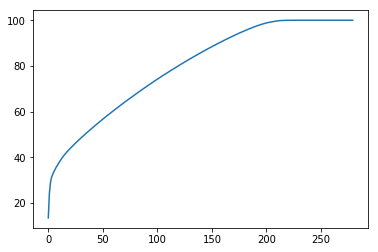

In [105]:
plt.plot(cumsum)

Text(0.5,1,'PCA')

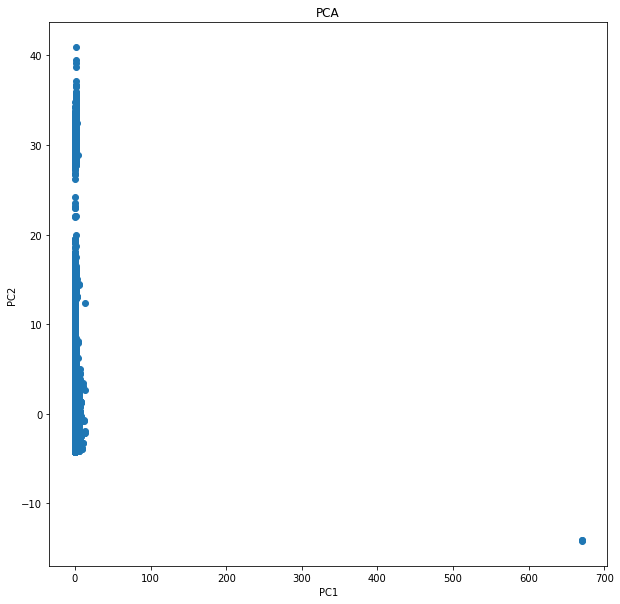

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(principle_components[:,0],principle_components[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")

In [125]:
pca_model = PCA(n_components=270)

In [126]:
train_pca = pca_model.fit_transform(xtrain_sc)
test_pca = pca_model.fit_transform(xtest_sc)

In [127]:
lin2 = LinearRegression()

In [128]:
lin2.fit(train_pca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
y_pred = lin2.predict(test_pca)

In [130]:
mean_sqr_error(y_test,y_pred)

1374.9503056111707

In [131]:
print(r2_score(y_test,y_pred))

0.047821287581508054


## Lasso And Ridge Regression 

In [141]:
alpha_val = 10**np.linspace(-3,5,10)

In [142]:
alpha_val

array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
       3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
       1.29154967e+04, 1.00000000e+05])

In [143]:
def mean_sqr_error(y,y_pred):
    return np.mean((y-y_pred)**2)

In [144]:
mean_sqr_error(y_test,y_pred) ## Linear Regression 

1374.9503056111707

## Ridge 

In [145]:
from sklearn.linear_model import RidgeCV

In [146]:
ridge = RidgeCV(alphas=alpha_val)

In [147]:
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([1.00000e-03, 7.74264e-03, 5.99484e-02, 4.64159e-01, 3.59381e+00,
       2.78256e+01, 2.15443e+02, 1.66810e+03, 1.29155e+04, 1.00000e+05]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [172]:
print("The best alpha value is", ridge.alpha_)
print("Features selected", ridge.coef_.nonzero()[0].size)
print("The R^2 is ", ridge.score(x_train,y_train))
print("The MSE of the best model is", mean_squared_error(y_train, ridge.predict(x_train)))

The best alpha value is 100000.0
Features selected 276
The R^2 is  0.3482460345006955
The MSE of the best model is 920.3712766269895


## Lasso 

In [149]:
from sklearn.linear_model import LassoCV

In [150]:
lasso = LassoCV(alphas=alpha_val)

In [152]:
lasso.fit(x_train,y_train)

In [177]:
print('The best alpha value : ',lasso.alpha_)
print('Feature selected: ',lasso.coef_.nonzero()[0].size)
print('The R^2 :',lasso.score(x_train,y_train))
print('The Mse:', mean_sqr_error(y_train,lasso.predict(x_train)))

The best alpha value :  3.593813663804626
Feature selected:  15
The R^2 : 0.34484508438332623
The Mse: 925.173912233306


## Elastic Net

In [159]:
from sklearn.linear_model import ElasticNetCV

In [160]:
el_net = ElasticNetCV(alphas=alpha_val) 

In [162]:
el_net.fit(x_train,y_train)

In [170]:
print('The best alpha value : ',el_net.alpha_)
print('Feature selected: ',el_net.coef_.nonzero()[0].size)
print('The R^2 :',el_net.score(x_train,y_train))
print('The Mse:', mean_sqr_error(y_train,el_net.predict(x_train)))

The best alpha value :  27.825594022071257
Feature selected:  14
The R^2 : 0.34066783933172706
The Mse: 931.0727890556101


## Ridge , Lasso and ElasticNet on Test data

## Ridge 

In [167]:
print("The R^2 : ", ridge.score(x_test,y_test))
print("The MSE :", mean_squared_error(y_test, ridge.predict(x_test)))

The R^2 :  0.37460527583246983
The MSE : 903.072769751054


## Lasso 

In [168]:
print("The R^2 : ", lasso.score(x_test,y_test))
print("The MSE :", mean_squared_error(y_test, lasso.predict(x_test)))

The R^2 :  0.37711351166343354
The MSE : 899.4508660292528


## Elastic Net 

In [173]:
print("The R^2 : ", el_net.score(x_test,y_test))
print("The MSE :", mean_squared_error(y_test, el_net.predict(x_test)))

The R^2 :  0.3764360253134077
The MSE : 900.4291593389713


## Conclusion of Linear Models

## Best model is Lasso Regression 
   
The best alpha value :  3.593813663804626

Feature selected:  15

### On Train dataset:

The R^2 : 0.34484508438332623

The Mse: 925.173912233306 


### On Test dataset: 

The R^2 :  0.3764360253134077

The MSE : 900.4291593389713

# Non-Linear Models

## Random Forest Regression

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
rand_forest = RandomForestRegressor()

In [181]:
rand_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [182]:
rand_forest.score(x_train,y_train)

0.8966579529447974

In [183]:
mean_squared_error(y_test,rand_forest.predict(x_test))

551.9933407996473

## Xg Bossting (Ensemble Model)

In [8]:
from xgboost import XGBRegressor

In [9]:
xg = XGBRegressor()

In [20]:
xg.fit(x_train,y_train)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:49:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [25]:
xg.score(x_train,y_train)

0.6880250607051239

In [23]:
mean_squared_error(y_test,xg.predict(x_test))

533.5748433911849

## Conclusion of Non-Linear Models

Random forest outperforms Xg Boost 